## 3-sigma Rule 이상탐지
___

* 정의
```
# SPC(Statistical Process Control, 통계적 공정관리), 경험적 규칙(empirical rule)
# 표준편차의 3배인 3*Sigma(σ)의 범위가 전체 Data의 99.7%를 포함
# 나머지 불량률을 0.3퍼까지만 관리하겠다는 공정관리에서 주로 쓰이는 룰
# Data 전체의 산포를 파악하는 개념으로 많이 활용됨
# 상한선 UCL(Upper Control Limit) / 하한선 LCL(Lower Control Limit)
# Unsupervised
```
<img src = "https://drive.google.com/uc?id=1iX8VeZrJADyEf1hwYiNb4JX2HhpBTra2">

* 장단점
```
  # [good] 매우 구현하기 쉬움
  # [good] 명확한 기준을 설정할 수 있기 때문에, 방법론에 재학습이 필요없음
  # [bad] 정규분포가 가정되어야 함. 즉, 정규분포임을 확인하고 쓰는 게 맞다.
  # [bad] 다차원 데이터에 적용하기 어려움
  # [bad] 단변량 데이터에 적용할 수 있으며, Feature간 상호관계를 파악하기 어려움
  # [bad] 평균과 표준편차를 이용해 계산하기 때문에 outlier에 민감하다.
```
  
* 사용방법
```
# 데이터의 분포를 정규분포로 가정하고, 평균으로부터 (표준편차 x 시그마 계수σ)를 벗어나면 아웃라이어라고 판단함
# 시그마 계수(σ)
```

* 현업사례
```
# 공정 센서 데이터 이상탐지
# 검사 및 측정 데이터 이상탐지 
```
   


In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ▶ Toy data 생성
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.DataFrame({"name": ['KATE', 'LOUISE', 'JANE', 'JASON', 'TOM', 'JACK'], 
                   "weight": ['59', '61', '55', '66', '52', '110'], 
                   "height": ['120', '123', '115', '145', '64', '20']})
df

,name,weight,height
0,KATE,59,120
1,LOUISE,61,123
2,JANE,55,115
3,JASON,66,145
4,TOM,52,64
5,JACK,110,20


In [3]:
# ▶ data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   weight  6 non-null      object
 2   height  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


In [4]:
# ▶ 숫자형 데이터로 변경
df['weight'] = df['weight'].astype(int)
df['height'] = df['height'].astype(int)

In [5]:
# ▶ UCL, LCL 생성
df['UCL_W'] = df['weight'].mean() + 2*df['weight'].std()
df['LCL_W'] = df['weight'].mean() - 2*df['weight'].std()

df['UCL_H'] = df['height'].mean() + 2*df['height'].std()
df['LCL_H'] = df['height'].mean() - 2*df['height'].std()

In [6]:
# ▶ data 확인
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H
0,KATE,59,120,110.237152,24.096182,190.986254,4.680412
1,LOUISE,61,123,110.237152,24.096182,190.986254,4.680412
2,JANE,55,115,110.237152,24.096182,190.986254,4.680412
3,JASON,66,145,110.237152,24.096182,190.986254,4.680412
4,TOM,52,64,110.237152,24.096182,190.986254,4.680412
5,JACK,110,20,110.237152,24.096182,190.986254,4.680412


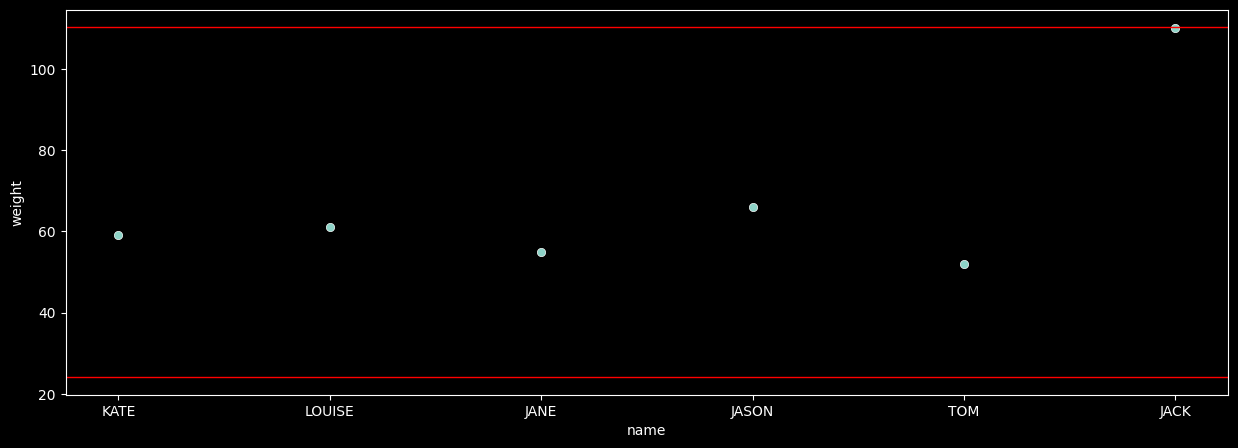

In [7]:
# ▶ weight plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.scatterplot(x=df['name'], y=df['weight']);
plt.axhline(y=df['UCL_W'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_W'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

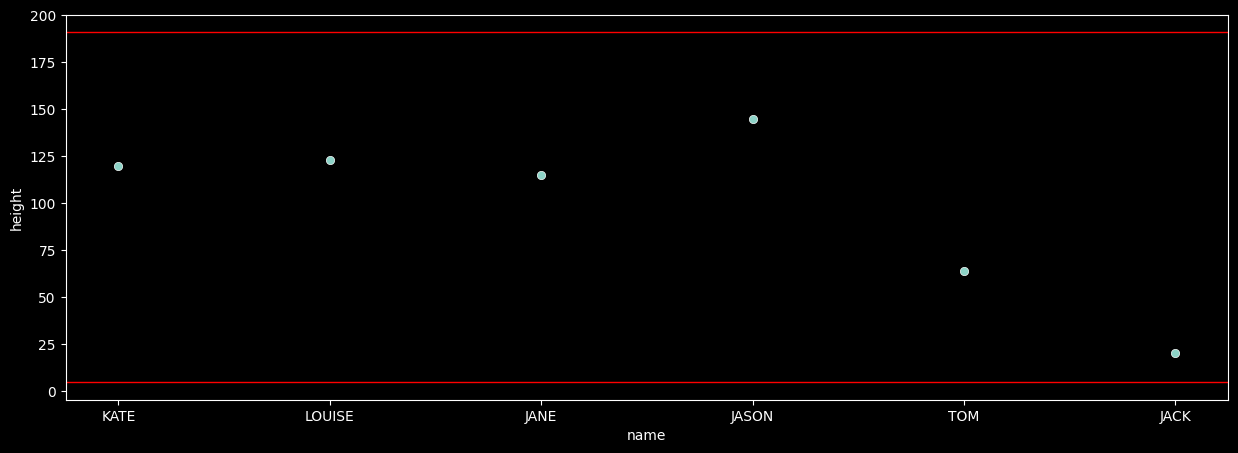

In [8]:
# ▶ height plot 
sns.scatterplot(x=df['name'], y=df['height']);
plt.axhline(y=df['UCL_H'][0], color='r', linewidth=1)
plt.axhline(y=df['LCL_H'][0], color='r', linewidth=1)
plt.gcf().set_size_inches(15, 5)

시각화한 것으로 보아 Jack의 weight이 상한선을 넘는 것으로 보여 3-Sigma Rule 알고리즘에 따라 Jack을 아웃라이어로 판단할 수 있습니다.